In [2]:
import sys
import ROOT as R
from tqdm import tqdm
from VBSAnalysis.EventIterator import EventIterator
from VBSAnalysis.Utils import JetSelectors as sel
from VBSAnalysis import JetTagging
import plotter
plotter.setStyle()

In [2]:
f = R.TFile("data/ewk_signal_partial.root", "UPDATE")

# W jet selection
In this macro we test the selection of the couple of jets with $M_{jj}$ nearest to W mass. We do the selection also on the partons and compare the two levels. 

In [3]:
hs = R.THStack("hs_mjj","Mjj W jet");
h_mjj = R.TH1F("mjj", "Mjj W jet", 60, 20, 150 )
h_mjj.SetLineColor(R.kRed)
h_mjj.SetFillColor(R.kRed)
h_mjj.SetFillStyle(3004)
hs.Add(h_mjj)
h_mjj_bad = R.TH1F("mjj_bad", "Mjj W jet wrong", 60, 20, 150)
h_mjj_bad.SetFillColor(R.kBlue)
h_mjj_bad.SetFillStyle(3005)
hs.Add(h_mjj_bad)
h_mjj_partons = R.TH1F("mjj_partons", "Mjj W partons", 60, 20, 150 )
h_mjj_partons.SetFillColor(R.kBlue)
h_mjj_partons.SetFillStyle(3005)

## Selections
We work only with events with 4 jets. An event is bad when the selected jets don't correspond to the selected partons or when the event is flagged as bad associated to partons (flag = 2)

In [7]:
cuts = [
    ("eq_flag", 1),
    ("pt_min_jets", 30),
    ("min_njets", 4)
]

previous_id = 0
with tqdm_notebook(total=f.tree.GetEntries()) as pbar:
    for event in EventIterator(f, cuts,pairing=True):
        # W pair of partons
        partons_pair = sel.nearest_W_pair(event.partons)
        jets_pair = sel.nearest_W_pair(event.jets)
        ok = JetTagging.check_association(event, jets_pair, partons_pair)
        if ok and event.flag <= 1  :
            h_mjj.Fill( (event.jets[jets_pair[0]]+ event.jets[jets_pair[1]]).M())
        else:
            h_mjj_bad.Fill( (event.jets[jets_pair[0]]+ event.jets[jets_pair[1]]).M())
        h_mjj_partons.Fill( (event.partons[partons_pair[0]]+ event.partons[partons_pair[1]]).M())
        pbar.update(event.evId - previous_id)
        previous_id = event.evId

The red distribution are the events well associated to partons, the blu are the bad ones. 

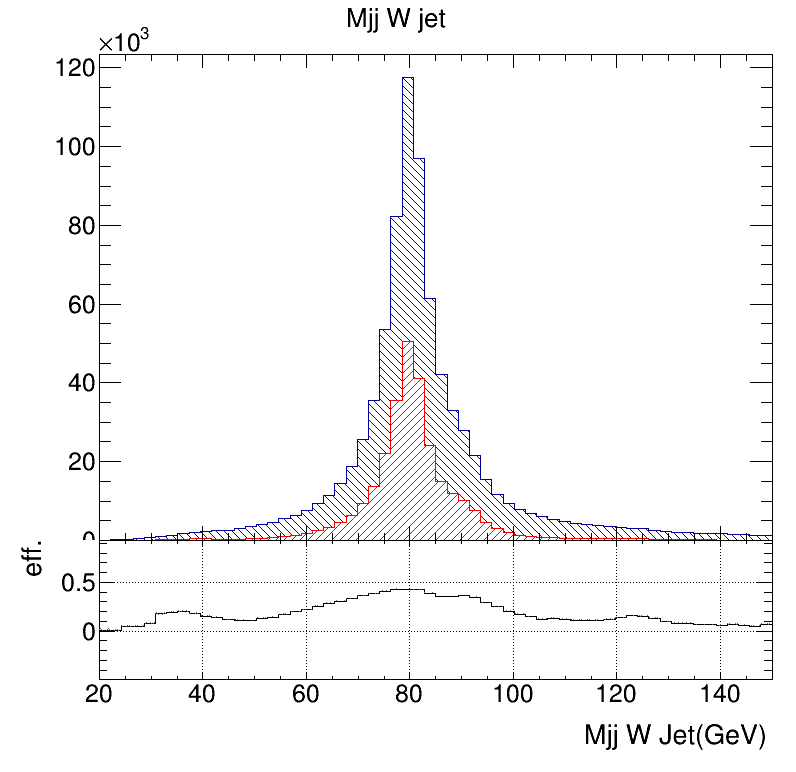

In [8]:
c1, pad1,pad2 = plotter.createCanvasPads()
pad1.cd()
hs.Draw("hist")
h_mjj.GetXaxis().SetTitle("Mjj W Jet(GeV)")
pad2.cd()
hratio = plotter.createRatio(h_mjj, h_mjj +h_mjj_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
c1.Draw()

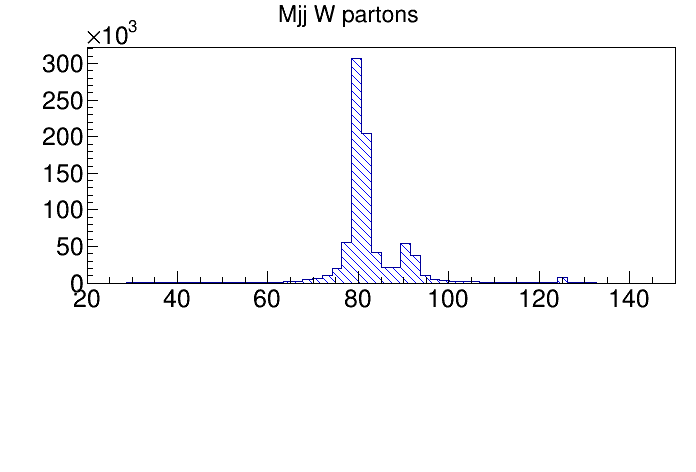

In [10]:
c2 = R.TCanvas("c2")
h_mjj_partons.Draw("hist")
c2.Draw()

# VBS jet selection
## Max Mjj
Select the VBS jets using max_mjj criteria

In [17]:
hs_vbs = R.THStack("hs_mjj_vbs","Mjj W jet");
h_mjj_vbs = R.TH1F("mjj_vbs", "Mjj VBS jets", 100, 60, 3000 )
h_mjj_vbs.SetLineColor(R.kRed)
h_mjj_vbs.SetFillColor(R.kRed)
h_mjj_vbs.SetFillStyle(3004)
hs_vbs.Add(h_mjj_vbs)
h_mjj_bad_vbs = R.TH1F("mjj_bad_vbs", "Mjj VBS wrong", 100, 60, 3000)
h_mjj_bad_vbs.SetFillColor(R.kBlue)
h_mjj_bad_vbs.SetFillStyle(3005)
hs_vbs.Add(h_mjj_bad_vbs)
h_mjj_partons_vbs = R.TH1F("mjj_partons_vbs", "Mjj VBS partons", 100,  60, 3000 )
h_mjj_partons_vbs.SetFillColor(R.kBlue)
h_mjj_partons_vbs.SetFillStyle(3005)

In [18]:
previous_id = 0
cuts = [
    ("eq_flag", 1),
    ("pt_min_jets", 30),
    ("min_njets", 4)
]

with tqdm_notebook(total=f.tree.GetEntries()) as pbar:
    for event in EventIterator(f, cuts, pairing=True):
        # VBS pair of partons
        partons_pair = sel.max_mjj_pair(event.partons)
        jets_pair = sel.max_mjj_pair(event.jets)
        ok = JetTagging.check_association(event, jets_pair, partons_pair)
        if ok and event.flag <= 1  :
            h_mjj_vbs.Fill( (event.jets[jets_pair[0]]+ event.jets[jets_pair[1]]).M())
        else:
            h_mjj_bad_vbs.Fill( (event.jets[jets_pair[0]]+ event.jets[jets_pair[1]]).M())
        h_mjj_partons_vbs.Fill( (event.partons[partons_pair[0]]+ event.partons[partons_pair[1]]).M())
        pbar.update(event.evId - previous_id)
        previous_id = event.evId

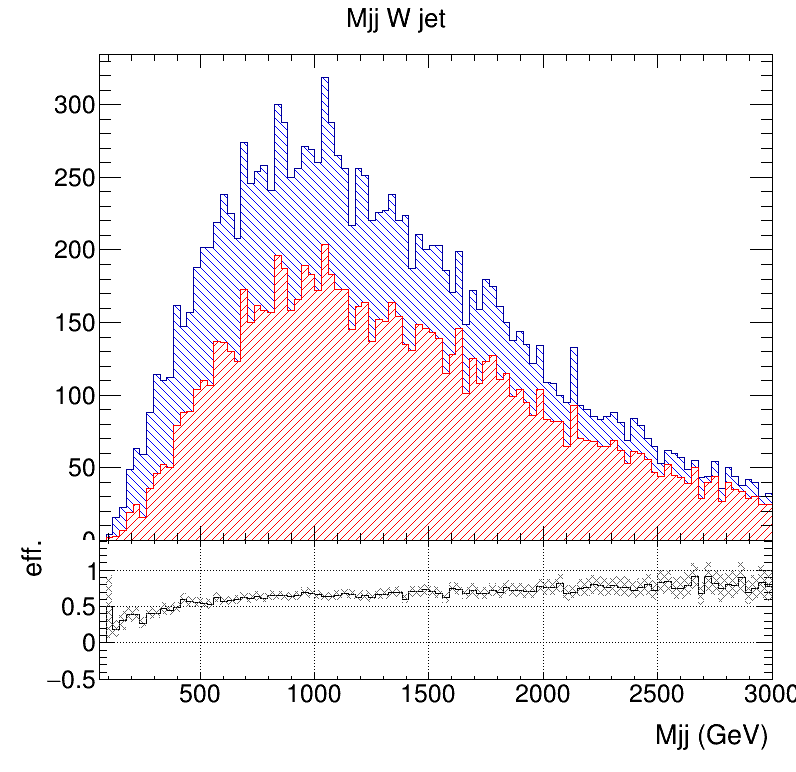

In [19]:
c1, pad1,pad2 = plotter.createCanvasPads()
pad1.cd()
hs_vbs.Draw("hist")
h_mjj_vbs.GetXaxis().SetTitle("Mjj (GeV)")
pad2.cd()
hratio = plotter.createRatio(h_mjj_vbs, h_mjj_vbs+h_mjj_bad_vbs, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
c1.Draw()

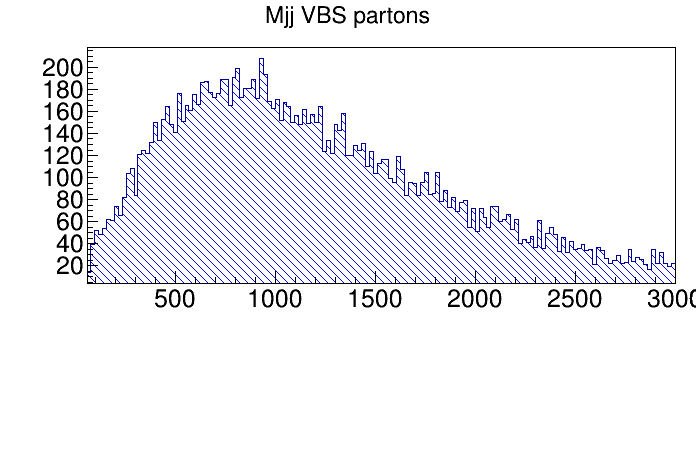

In [14]:
c4 = R.TCanvas("c4")
h_mjj_partons_vbs.Draw("hist")
c4.Draw()

## Max eta

In [15]:
hs_vbs = R.THStack("hs_mjj_vbs_eta","Mjj W jet");
h_mjj_vbs = R.TH1F("mjj_vbs_eta", "Mjj VBS jets", 80, 60, 3000 )
h_mjj_vbs.SetLineColor(R.kRed)
h_mjj_vbs.SetFillColor(R.kRed)
h_mjj_vbs.SetFillStyle(3004)
hs_vbs.Add(h_mjj_vbs)
h_mjj_bad_vbs = R.TH1F("mjj_bad_vbs_eta", "Mjj VBS wrong", 80, 60, 3000)
h_mjj_bad_vbs.SetFillColor(R.kBlue)
h_mjj_bad_vbs.SetFillStyle(3005)
hs_vbs.Add(h_mjj_bad_vbs)
h_mjj_partons_vbs = R.TH1F("mjj_partons_vbs_eta", "Mjj VBS partons", 80, 60, 3000 )
h_mjj_partons_vbs.SetFillColor(R.kBlue)
h_mjj_partons_vbs.SetFillStyle(3005)

In [16]:
previous_id = 0
cuts = [
    ("eq_flag", 1),
    ("pt_min_jets", 30),
    ("min_njets", 4)
]
with tqdm_notebook(total=f.tree.GetEntries()) as pbar:
    for event in EventIterator(f, cuts, pairing=True):
        # VBS pair of partons
        partons_pair = sel.max_deltaeta_pair(event.partons)
        jets_pair = sel.max_deltaeta_pair(event.jets)
        ok = JetTagging.check_association(event, jets_pair, partons_pair)
        if ok and event.flag <= 1  :
            h_mjj_vbs.Fill( (event.jets[jets_pair[0]]+ event.jets[jets_pair[1]]).M())
        else:
            h_mjj_bad_vbs.Fill( (event.jets[jets_pair[0]]+ event.jets[jets_pair[1]]).M())
        h_mjj_partons_vbs.Fill( (event.partons[partons_pair[0]]+ event.partons[partons_pair[1]]).M())
        pbar.update(event.evId - previous_id)
        previous_id = event.evId

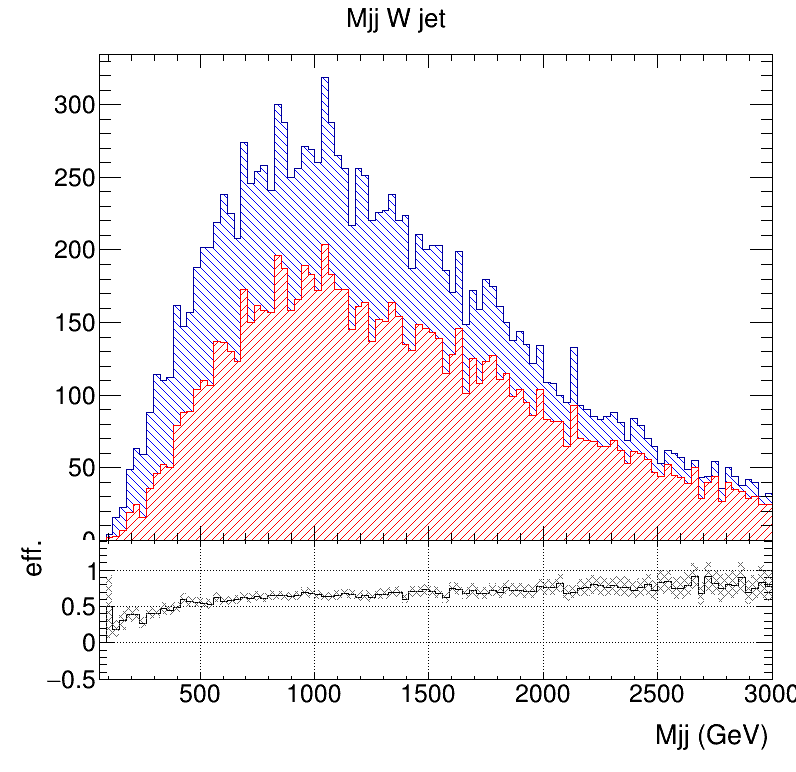

In [23]:
c1, pad1,pad2 = plotter.createCanvasPads()
pad1.cd()
hs_vbs.Draw("hist")
h_mjj_vbs.GetXaxis().SetTitle("Mjj (GeV)")
pad2.cd()
hratio = plotter.createRatio(h_mjj_vbs, h_mjj_vbs+h_mjj_bad_vbs, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
c1.Draw()

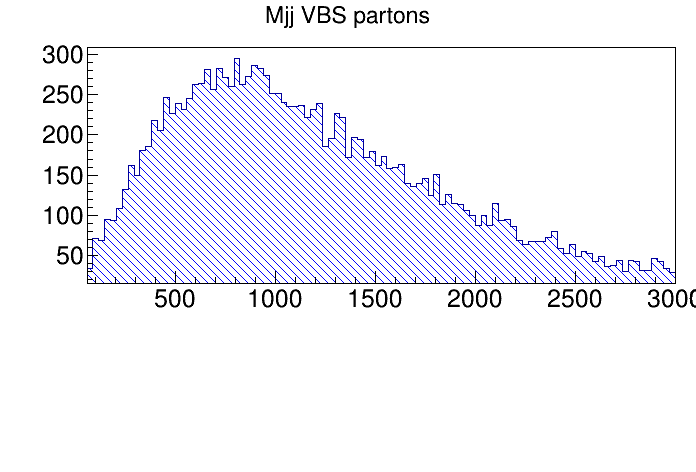

In [22]:
c4 = R.TCanvas("c4")
h_mjj_partons_vbs.Draw("hist")
c4.Draw()